In [36]:
import numpy as np
import matplotlib. pyplot as plt

Se escojen los parametros reales.

In [37]:
m_true = -0.9594
b_true = 4.294
f_true = 0.534

Genera algunos datos sinteticos del modelo

In [38]:
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1 + 0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

In [39]:
X0 = np.linspace(np.amin(x),np.amax(x))
Y0 = m_true*X0 + b_true

<Figure size 432x288 with 0 Axes>

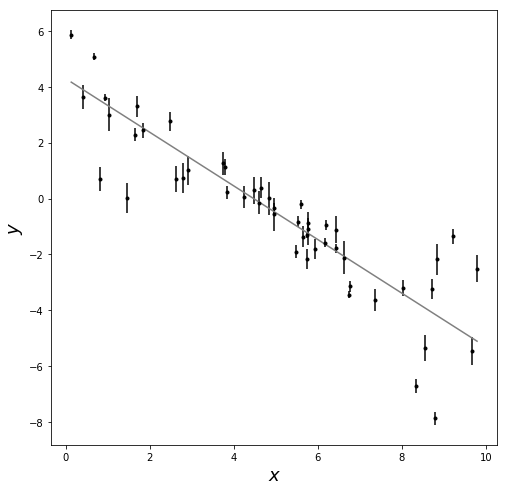

In [40]:
plt.figure(1)
plt.figure(figsize=(8,8))
plt.xlabel('$x$',fontsize = 18)
plt.ylabel('$y$',fontsize = 18)
plt.errorbar(x, y, yerr=yerr, color='0' ,fmt=".")
plt.plot(X0,Y0,color='0.5')

In [41]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

In [46]:
print('\n Ecuación: y =', m_ls, 'x ', b_ls)

('\n Ecuaci\xc3\xb3n: y =', -1.1176572705531405, 'x ', 5.070036148942769)


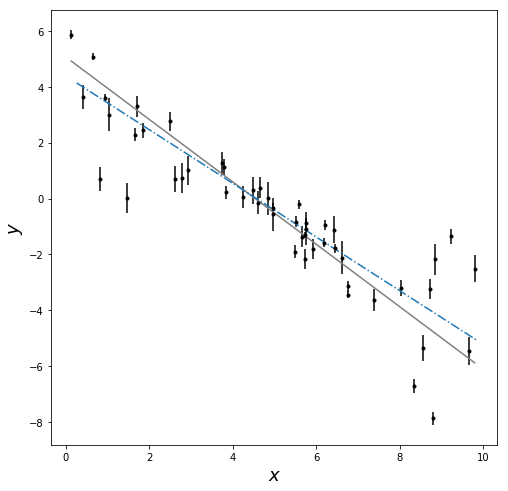

In [47]:
X_ls = np.linspace(np.amin(x),np.amax(x))
Y_ls = m_ls*X_ls + b_ls
plt.figure(figsize=(8,8))
plt.xlabel('$x$',fontsize = 18)
plt.ylabel('$y$',fontsize = 18)
plt.errorbar(x, y, yerr=yerr, color='0' ,fmt=".")
plt.plot(X_ls,Y_ls,color='0.5')
plt.plot(X1,Y1,'-.')

## Estimación del maximo Likelihood 

In [48]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [49]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]

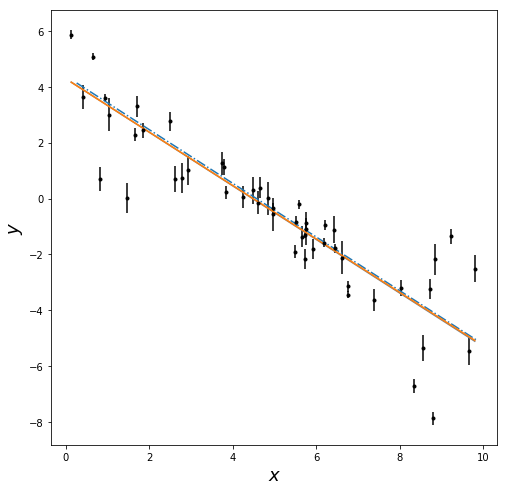

In [50]:
X_ml = np.linspace(np.amin(x),np.amax(x))
Y_ml = m_ml*X_ml + b_ml
plt.figure(figsize=(8,8))
plt.xlabel('$x$',fontsize = 18)
plt.ylabel('$y$',fontsize = 18)
plt.errorbar(x, y, yerr=yerr, color='0' ,fmt=".")
plt.plot(X0,Y0,color='0.5')
plt.plot(X1,Y1,'-.')
plt.plot(X_ml,Y_ml,'-')

## Minimizacion 

In [11]:
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

In [12]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [13]:
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [14]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))

In [15]:
sampler.run_mcmc(pos, 500)

(array([[-0.9735319 ,  4.31299672, -0.77848852],
        [-0.94246501,  4.3030735 , -0.59068349],
        [-0.88530257,  3.94796804, -0.49170506],
        [-0.96329691,  4.45968934, -0.64724429],
        [-1.00633424,  4.63915071, -0.80401359],
        [-1.05848633,  4.69606093, -0.89319492],
        [-1.08285997,  5.10208163, -0.78993485],
        [-1.04811534,  4.86345738, -0.6561942 ],
        [-0.99683323,  4.52832903, -0.8211489 ],
        [-1.03273617,  4.69032455, -0.749007  ],
        [-0.99681308,  4.57902858, -0.73849362],
        [-0.96094594,  4.34159727, -0.80804293],
        [-0.96110583,  4.36706913, -0.97094599],
        [-1.14606204,  5.27878392, -0.88358659],
        [-0.99759605,  4.63072334, -0.7550333 ],
        [-1.08227269,  4.71024857, -0.88037905],
        [-1.00962058,  4.46433504, -0.97714562],
        [-1.01993551,  4.71022174, -0.99849387],
        [-1.03500155,  4.76558677, -0.9885673 ],
        [-1.01271376,  4.58235835, -0.9731331 ],
        [-1.04642115

In [16]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

## Resultados

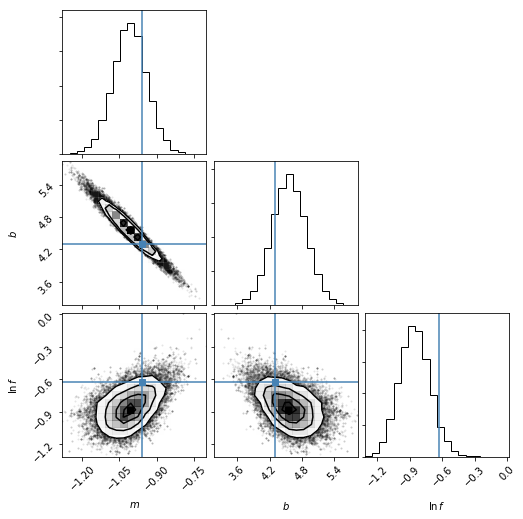

In [18]:
import corner
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"],
                      truths=[m_true, b_true, np.log(f_true)])
fig.savefig("triangle.png")